In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# definition of parameters
Ro = 6.219577546
Zo = 0.5143555944
a = 2.24
k = 1.90
d = 0.6
z = 0.06
ap = 2.18095 ## PIXIE3D normalization parameter
L = 1.0/ap

Definition of the vectors $\frac{\partial \vec{x}}{\partial \xi^i}$

Auxilliary functions

In [35]:
def csd(r,u,d):
    return np.cos(u + np.arcsin(d*(r**2)*np.sin(u)))

In [36]:
def snd(r,u,d):
    return np.sin(u + np.arcsin(d*(r**2)*np.sin(u)))

In [37]:
def snz(r,u,z):
    return np.sin(u + z*(r**2)*np.sin(2*u))

In [38]:
def csz(r,u,z):
    return np.cos(u + z*(r**2)*np.sin(2*u))

In [39]:
def sqrtdn(r,u,d):
    return np.sqrt(1 - ((d**2)*(r**4)*(np.sin(u))**2))

Tangent vectors

In [40]:
def dxdr(r,u,p,Ro,a,k,d,z):
    return L*(a*csd(r,u,d) - 2*a*d*(r**2)*np.sin(u)*(snd(r,u,d)/sqrtdn(r,u,d)))*np.cos(-p)

In [41]:
def dydr(r,u,p,Ro,a,k,d,z):
    return L*(a*csd(r,u,d) - 2*a*d*(r**2)*np.sin(u)*(snd(r,u,d)/sqrtdn(r,u,d)))*np.sin(-p)

In [42]:
def dzdr(r,u,p,Ro,a,k,d,z):
    return L*a*k*snz(r,u,z) + L*2*a*k*z*(r**2)*np.sin(2*u)*csz(r,u,z)

In [43]:
def dxdu(r,u,p,Ro,a,k,d,z):
    return -L*a*r*snd(r,u,d)*(1 + (d*(r**2)*np.cos(u)/sqrtdn(r,u,d)))*np.cos(-p)

In [44]:
def dydu(r,u,p,Ro,a,k,d,z):
    return -L*a*r*snd(r,u,d)*(1 + (d*(r**2)*np.cos(u)/sqrtdn(r,u,d)))*np.sin(-p)

In [45]:
def dzdu(r,u,p,Ro,a,k,d,z):
    return L*a*k*r*csz(r,u,z)*(1 + 2*(r**2)*z*np.cos(2*u))

In [46]:
def dxdp(r,u,p,Ro,a,k,d,z):
    return L*(Ro + a*r*csd(r,u,d))*np.sin(-p)

In [47]:
def dydp(r,u,p,Ro,a,k,d,z):
    return -L*(Ro + a*r*csd(r,u,d))*np.cos(-p)

In [48]:
def dzdp(r,u,p,Ro,a,k,d,z):
    return 0 

Definition of the metric tensor components

In [49]:
def g_rr(r,u,p,Ro,a,k,d,z):
    return dxdr(r,u,p,Ro,a,k,d,z)**2 + dydr(r,u,p,Ro,a,k,d,z)**2 +\
    dzdr(r,u,p,Ro,a,k,d,z)**2

In [50]:
def g_tt(r,u,p,Ro,a,k,d,z):
    return dxdu(r,u,p,Ro,a,k,d,z)**2 + dydu(r,u,p,Ro,a,k,d,z)**2 +\
    dzdu(r,u,p,Ro,a,k,d,z)**2

In [51]:
def g_pp(r,u,p,Ro,a,k,d,z):
    return dxdp(r,u,p,Ro,a,k,d,z)**2 + dydp(r,u,p,Ro,a,k,d,z)**2 +\
    dzdp(r,u,p,Ro,a,k,d,z)**2

In [52]:
def g_rt(r,u,p,Ro,a,k,d,z):
    return dxdr(r,u,p,Ro,a,k,d,z)*dxdu(r,u,p,Ro,a,k,d,z) +\
    dydr(r,u,p,Ro,a,k,d,z)*dydu(r,u,p,Ro,a,k,d,z) +\
    dzdr(r,u,p,Ro,a,k,d,z)*dzdu(r,u,p,Ro,a,k,d,z)

In [53]:
def g_rp(r,u,p,Ro,a,k,d,z):
    return dxdr(r,u,p,Ro,a,k,d,z)*dxdp(r,u,p,Ro,a,k,d,z) +\
    dydr(r,u,p,Ro,a,k,d,z)*dydp(r,u,p,Ro,a,k,d,z) +\
    dzdr(r,u,p,Ro,a,k,d,z)*dzdp(r,u,p,Ro,a,k,d,z)

In [54]:
def g_pt(r,u,p,Ro,a,k,d,z):
    return dxdp(r,u,p,Ro,a,k,d,z)*dxdu(r,u,p,Ro,a,k,d,z) +\
    dydp(r,u,p,Ro,a,k,d,z)*dydu(r,u,p,Ro,a,k,d,z) +\
    dzdp(r,u,p,Ro,a,k,d,z)*dzdu(r,u,p,Ro,a,k,d,z)

Producing arrays of components

In [55]:
Nr=101
Nu=101
Nf=101
r_range = np.linspace(0.01,1.0,Nr) # Avoid singularity at r=0
t_range = np.linspace(0.0,2*np.pi,Nu)
f_range = np.linspace(0.0,2*np.pi,Nf)

In [48]:
Grr = []
Gtt = []
Gpp = []
Grt = []
Grp = []
Gpt = []

for rr in r_range:
    for tt in t_range:
        for ff in f_range:
            Grr.append(g_rr(rr,tt,ff,Ro,a,k,d,z))
            Gtt.append(g_tt(rr,tt,ff,Ro,a,k,d,z))
            Gpp.append(g_pp(rr,tt,ff,Ro,a,k,d,z))
            Grt.append(g_rt(rr,tt,ff,Ro,a,k,d,z))
            Grp.append(g_rp(rr,tt,ff,Ro,a,k,d,z))
            Gpt.append(g_pt(rr,tt,ff,Ro,a,k,d,z))
        
Grr = np.reshape(Grr,(Nr,Nu,Nf))
Gtt = np.reshape(Gtt,(Nr,Nu,Nf))
Gpp = np.reshape(Gpp,(Nr,Nu,Nf))
Grt = np.reshape(Grt,(Nr,Nu,Nf))
Gtr = Grt
Grp = np.reshape(Grp,(Nr,Nu,Nf))
Gpr = Grp
Gpt = np.reshape(Gpt,(Nr,Nu,Nf))
Gtp = Gpt

In [67]:
# 2d array
Grr2d = []
Gtt2d = []
Gpp2d = []
Grt2d = []
Grp2d = []
Gpt2d = []

for rr in r_range:
    for tt in t_range:       
        Grr2d.append(g_rr(rr,tt,0.0,Ro,a,k,d,z))
        Gtt2d.append(g_tt(rr,tt,0.0,Ro,a,k,d,z))
        Gpp2d.append(g_pp(rr,tt,0.0,Ro,a,k,d,z))
        Grt2d.append(g_rt(rr,tt,0.0,Ro,a,k,d,z))
        Grp2d.append(g_rp(rr,tt,0.0,Ro,a,k,d,z))
        Gpt2d.append(g_pt(rr,tt,0.0,Ro,a,k,d,z))
        
Grr2d = np.reshape(Grr2d,(Nr,Nu))
Gtt2d = np.reshape(Gtt2d,(Nr,Nu))
Gpp2d = np.reshape(Gpp2d,(Nr,Nu))
Grt2d = np.reshape(Grt2d,(Nr,Nu))
Gtr2d = Grt2d
Grp2d = np.reshape(Grp2d,(Nr,Nu))
Gpr2d = Grp2d
Gpt2d = np.reshape(Gpt2d,(Nr,Nu))
Gtp2d = Gpt2d

Plotting individual components

In [68]:
rr,tt = np.meshgrid(r_range,t_range)

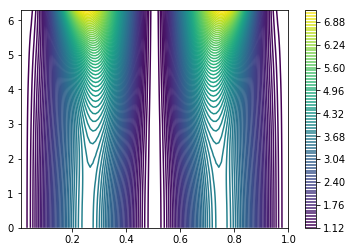

In [69]:
plt.contour(rr,tt,Grr2d[:,:],100)
plt.colorbar()
plt.show()

Contravariant components and Jacobian

In [51]:
# Initialize contravariant components 
grr_up = np.zeros((len(r_range),len(t_range),len(f_range)))
grt_up = np.zeros((len(r_range),len(t_range),len(f_range)))
grp_up = np.zeros((len(r_range),len(t_range),len(f_range)))
gtr_up = np.zeros((len(r_range),len(t_range),len(f_range)))
gtt_up = np.zeros((len(r_range),len(t_range),len(f_range)))
gtp_up = np.zeros((len(r_range),len(t_range),len(f_range)))
gpr_up = np.zeros((len(r_range),len(t_range),len(f_range)))
gpt_up = np.zeros((len(r_range),len(t_range),len(f_range)))
gpp_up = np.zeros((len(r_range),len(t_range),len(f_range)))

In [70]:
# Initialize 2d contravariant components 
grr2d_up = np.zeros((len(r_range),len(t_range)))
grt2d_up = np.zeros((len(r_range),len(t_range)))
grp2d_up = np.zeros((len(r_range),len(t_range)))
gtr2d_up = np.zeros((len(r_range),len(t_range)))
gtt2d_up = np.zeros((len(r_range),len(t_range)))
gtp2d_up = np.zeros((len(r_range),len(t_range)))
gpr2d_up = np.zeros((len(r_range),len(t_range)))
gpt2d_up = np.zeros((len(r_range),len(t_range)))
gpp2d_up = np.zeros((len(r_range),len(t_range)))

In [52]:
# Initialize determinant
J = np.zeros((len(r_range),len(t_range),len(f_range)))

In [71]:
# Initialize 2d determinant
J2d = np.zeros((len(r_range),len(t_range)))

In [55]:
# Contravariant components by inverting covariant the metric tensor 
for i in range(len(r_range)):
    for j in range(len(t_range)):
        for k in range(len(f_range)):
            A = [[Grr[i,j,k],Grt[i,j,k],Grp[i,j,k]],[Gtr[i,j,k],Gtt[i,j,k],Gtp[i,j,k]],[Gpr[i,j,k],Gpt[i,j,k],Gpp[i,j,k]]]
            J[i,j,k] = np.sqrt(np.linalg.det(A))
        B = np.linalg.inv(A)
        grr_up[i,j] = B[0,0]
        grt_up[i,j] = B[0,1]
        grp_up[i,j] = B[0,2]
        gtr_up[i,j] = B[1,0]
        gtt_up[i,j] = B[1,1]
        gtp_up[i,j] = B[1,2]
        gpr_up[i,j] = B[2,0]
        gpt_up[i,j] = B[2,1]
        gpp_up[i,j] = B[2,2]

In [72]:
# Contravariant components by inverting covariant the 2d metric tensor 
for i in range(len(r_range)):
    for j in range(len(t_range)):
        A2d = [[Grr2d[i,j],Grt2d[i,j],Grp2d[i,j]],[Gtr2d[i,j],Gtt2d[i,j],Gtp2d[i,j]],[Gpr2d[i,j],Gpt2d[i,j],Gpp2d[i,j]]]
        J2d[i,j] = np.sqrt(np.linalg.det(A2d))
        B2d = np.linalg.inv(A2d)
        grr2d_up[i,j] = B2d[0,0]
        grt2d_up[i,j] = B2d[0,1]
        grp2d_up[i,j] = B2d[0,2]
        gtr2d_up[i,j] = B2d[1,0]
        gtt2d_up[i,j] = B2d[1,1]
        gtp2d_up[i,j] = B2d[1,2]
        gpr2d_up[i,j] = B2d[2,0]
        gpt2d_up[i,j] = B2d[2,1]
        gpp2d_up[i,j] = B2d[2,2]

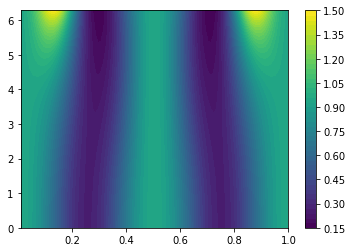

In [74]:
plt.contourf(rr,tt,grr2d_up[:,:],50)
plt.colorbar()
plt.show()

In [34]:
np.where(J==0)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

Saving

In [65]:
path = "/users/giannis_kx/FTLE_Giovanni/"

In [57]:
np.savez(path+'shaped_metric_coeff3d',grr_do=Grr,gtt_do=Gtt,gpp_do=Gpp,grt_do=Grt,grp_do = Grp,gtp_do = Gtp,grr_up=grr_up,grt_up=grt_up,\
         gtt_up=gtt_up,gtp_up=gtp_up,gpp_up=gpp_up,grp_up=grp_up,radial_grid=r_range,pol_grid=t_range,tor_grid=f_range, Jacobian=J)

We need to swap the axes to have the correct result

In [75]:
np.savez(path+'shaped_metric_coeff2d2',grr_do=np.swapaxes(Grr2d,0,1),gtt_do=np.swapaxes(Gtt2d,0,1),gpp_do=np.swapaxes(Gpp2d,0,1),grt_do=np.swapaxes(Grt2d,0,1),grp_do = np.swapaxes(Grp2d,0,1),gtp_do = np.swapaxes(Gtp2d,0,1),grr_up=np.swapaxes(grr2d_up,0,1),grt_up=np.swapaxes(grt2d_up,0,1),\
         gtt_up=np.swapaxes(gtt2d_up,0,1),gtp_up=np.swapaxes(gtp2d_up,0,1),gpp_up=np.swapaxes(gpp2d_up,0,1),grp_up=np.swapaxes(grp2d_up,0,1),radial_grid=r_range,pol_grid=t_range, Jacobian=J2d)

## Check components to see if there is anything funny

In [455]:
Comp = np.zeros((len(r_range),len(t_range)))
for i in range(len(r_range)):
    for j in range(len(t_range)):
        Comp[i,j] = dzdu(r_range[i],t_range[j],0.,Ro,a,k,d,z)

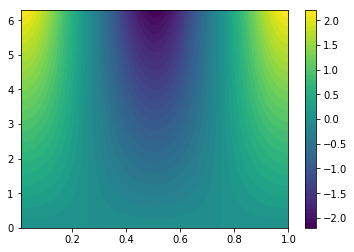

In [456]:
plt.contourf(rr,tt,Comp,50)
plt.colorbar()
plt.show()

## Cylindrical Coordinates Jacobian

In [666]:
# Initialize determinant
Roo = 1.65
Jac_Cyl = np.zeros((len(r_range),len(t_range)))
# Contravariant components by inverting covariant the metric tensor 
for i in range(len(r_range)):
    for j in range(len(t_range)):
        A = [[np.cos(t_range[j]),-r_range[i]*np.sin(t_range[j]),0],[0,0,-(Roo+r_range[i]*np.cos(t_range[j]))],\
             [np.sin(t_range[j]),r_range[i]*np.cos(t_range[j]),0]]
        Jac_Cyl[i,j] = np.linalg.det(A)

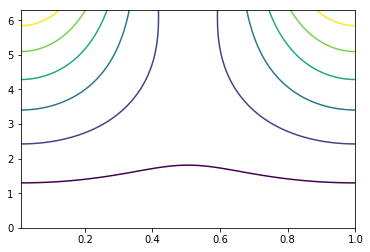

In [667]:
plt.contour(r_range,t_range,Jac_Cyl)
plt.show()

In [554]:
np.save(path+'Jac_Cyl.npy',Jac_Cyl)

In [668]:
# g_pp component of cylindrical metric
def dxdzeta(r,th,fi):
    return (Roo + r*np.cos(th))*np.sin(-fi)

In [669]:
def dydzeta(r,th,fi):
    return -(Roo + r*np.cos(th))*np.cos(-fi)

In [670]:
def gpp_cyl(r,th,fi):
    return dxdzeta(r,th,fi)**2 + dydzeta(r,th,fi)**2

In [671]:
gppcyl = np.zeros((len(r_range),len(t_range)))
# Contravariant components by inverting covariant the metric tensor 
for i in range(len(r_range)):
    for j in range(len(t_range)):
        gppcyl[i,j] = gpp_cyl(r_range[i],t_range[j],0)

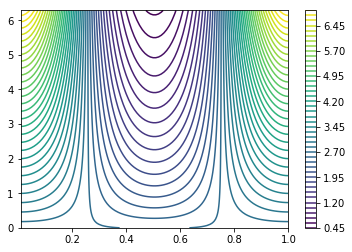

In [674]:
plt.contour(r_range,t_range,gppcyl,50)
plt.colorbar()
plt.show()

In [675]:
np.save(path+'gppcyl.npy',gppcyl)